# Algebra Linear Computacional - Lista 4

## Mayara Aragão

### Exercício 1)

$$f(x)= log(cosh(x\sqrt{gk}))−50$$

$$g = 9.806,  k = 0.00341$$

Plotando o gráfico da função utilizando a biblioteca matplotlib do python, para verificar intervalo de raízes:

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

Definindo a função:

In [2]:
def f(x):
    g = 9.806
    k = 0.00341
    y = np.log(np.cosh(x * np.sqrt(g*k)))-50
    return y

In [3]:
X = np.linspace(-300, 300, 1000)
F = np.vectorize(f)
plt.rcParams['figure.figsize'] = (9,3)
plt.plot(X, F(X), 'g-')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>

Mais aproximadamente entre os pontos $ x = 250 $ e $ x=300$

In [4]:
X = np.linspace(250, 300, 100)
F = np.vectorize(f)
plt.rcParams['figure.figsize'] = (9,3)
plt.plot(X, F(X), 'g-')
plt.ylim(-10, 10)
plt.grid()
plt.show()

<IPython.core.display.Javascript object>

A função é simétrica em relação ao eixo 𝑦, portando, plotando o gráfico da função para  $x=−300$  e  $x=−250$:

<IPython.core.display.Javascript object>


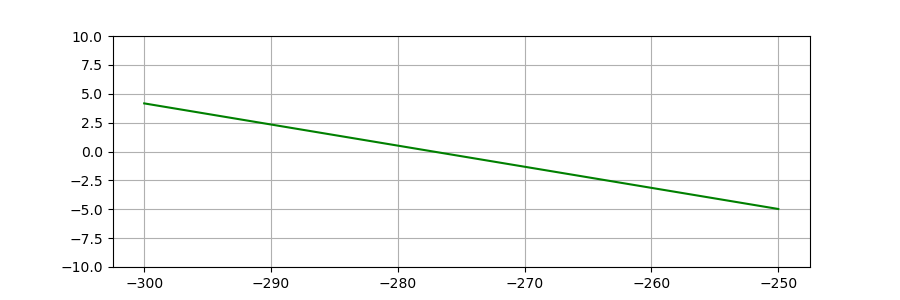

In [5]:
X = np.linspace(-300,-250, 100)
F = np.vectorize(f)
plt.plot(X, F(X), 'g-')
plt.ylim(-10, 10)
plt.grid()
plt.show()

#### Método da Bisseção:

Definindo a tolerância:

In [6]:
tol = 0.0001

In [7]:
def ordena(a, b):
    if a < b:
        return a, b
    return b, a

In [8]:
def bissecao(a, b, tol):
    a, b = ordena(a, b)
    err = abs(b-a)
    aux = a
    it = 0
    while err >= tol:
        x = (a+b)/2.0
        print(' ', it,'   {:>8,.5f}  '.format(a),'  {:>8,.5f}  '.format(b), '  {:>8,.5f}  '.format(x),
              '  {:>8,.5f}  '.format(f(x)), '  {:>8,.5f}  '.format(err))
        if f(x)*f(a) < 0:
            b = x
        elif f(x)*f(a) > 0:
            a = x
        else:
            return x
        err = abs(x-aux)
        aux = x
        it += 1
    print(' ', it,'   {:>8,.5f}  '.format(a),'  {:>8,.5f}  '.format(b), '  {:>8,.5f}  '.format(x),
          '  {:>8,.5f}  '.format(f(x)), '  {:>8,.5f}  '.format(err))
    return x

In [9]:
a = 250
b = 300
print('ITER       a             b             x           f(x)          Err')
x = bissecao(a, b, tol)
print("\nA raiz exata é x= %.5f" % x)

ITER       a             b             x           f(x)          Err
  0    250.00000     300.00000     275.00000     -0.40614     50.00000  
  1    275.00000     300.00000     287.50000      1.87964     25.00000  
  2    275.00000     287.50000     281.25000      0.73675     12.50000  
  3    275.00000     281.25000     278.12500      0.16531      6.25000  
  4    275.00000     278.12500     276.56250     -0.12041      3.12500  
  5    276.56250     278.12500     277.34375      0.02245      1.56250  
  6    276.56250     277.34375     276.95312     -0.04898      0.78125  
  7    276.95312     277.34375     277.14844     -0.01327      0.39062  
  8    277.14844     277.34375     277.24609      0.00459      0.19531  
  9    277.14844     277.24609     277.19727     -0.00434      0.09766  
  10    277.19727     277.24609     277.22168      0.00012      0.04883  
  11    277.19727     277.22168     277.20947     -0.00211      0.02441  
  12    277.20947     277.22168     277.21558     -0.

Para raiz negativa:

In [10]:
a = -250
b = -300
print('ITER       a             b              x             f(x)         Err')
x = bissecao(a, b, tol)
print("\nA raiz exata é x= %.5f" % x)

ITER       a             b              x             f(x)         Err
  0    -300.00000     -250.00000     -275.00000     -0.40614     50.00000  
  1    -300.00000     -275.00000     -287.50000      1.87964     25.00000  
  2    -287.50000     -275.00000     -281.25000      0.73675     12.50000  
  3    -281.25000     -275.00000     -278.12500      0.16531      6.25000  
  4    -278.12500     -275.00000     -276.56250     -0.12041      3.12500  
  5    -278.12500     -276.56250     -277.34375      0.02245      1.56250  
  6    -277.34375     -276.56250     -276.95312     -0.04898      0.78125  
  7    -277.34375     -276.95312     -277.14844     -0.01327      0.39062  
  8    -277.34375     -277.14844     -277.24609      0.00459      0.19531  
  9    -277.24609     -277.14844     -277.19727     -0.00434      0.09766  
  10    -277.24609     -277.19727     -277.22168      0.00012      0.04883  
  11    -277.22168     -277.19727     -277.20947     -0.00211      0.02441  
  12    -277.22

#### Método de Newton original:

Definindo a derivada $f'(x)$

In [11]:
def fder(x):
    cte = (9.806*0.00341)**0.5
    return (cte*np.sinh(x * cte)/np.cosh(x * cte))

In [12]:
def newton(x0, tol, it_max):
    it = 0
    err = 10
    while (err >= tol) and (it < it_max):
        x = x0 - f(x0)/fder(x0)
        err = abs(x-x0)
        print(' ', it,'   {:>8,.4f}  '.format(x0),'  {:>8,.4f}  '.format(f(x0)), 
            '  {:>8,.4f}  '.format(fder(x0)),'  {:>8,.5f}  '.format(err))
        x0 = x
        it += 1
    return (x, it)

Definindo $x_0=10$ para encontrar raíz positiva:

In [13]:
x0 = 10
it_max = 100
tol = 0.0001

In [14]:
print("ITER       x0         f(x)          f'(x)        Err")
x, i = newton(x0, tol, it_max)
if i == it_max:
    print("O método não convergiu")
print("\nRaiz encontrada x= %.5f" % x)

ITER       x0         f(x)          f'(x)        Err
  0     10.0000     -48.8391       0.1737     281.23015  
  1    291.2302       2.5617       0.1829     14.00916  
  2    277.2210       0.0000       0.1829      0.00000  

Raiz encontrada x= 277.22100


Para raiz negativa, iniciando com $x_0=-10$:

In [15]:
x0 = -10
print("ITER       x0         f(x)          f'(x)        Err")
x, i = newton(x0, tol, it_max)
if i == it_max:
    print("O método não convergiu")
print("\nRaiz encontrada x= %.5f" % x)

ITER       x0         f(x)          f'(x)        Err
  0    -10.0000     -48.8391      -0.1737     281.23015  
  1    -291.2302       2.5617      -0.1829     14.00916  
  2    -277.2210       0.0000      -0.1829      0.00000  

Raiz encontrada x= -277.22100


#### Método da Secante:

In [16]:
def secante(x0, tol, it_max):
    delta = 0.001
    x1 = x0 + delta
    fa = f(x0)
    it = 0
    err = 10
    while (err >= tol) and (it < it_max):
        fi = f(x1)
        x2 = x1 - (fi*(x1-x0)/(fi-fa))
        err = abs(x2-x1)
        print(' ', it,'   {:>8,.4f}  '.format(x0),'  {:>8,.4f}  '.format(x1), 
            '  {:>8,.4f}  '.format(x2),'  {:>8,.5f}  '.format(err))
        x0 = x1
        x1 = x2
        fa = fi
        it += 1
    return (x1, it)

Iniciando com $x_0=10$ para encontrar raiz posiviva:

In [17]:
x0 = 10
print("ITER     x_k-1         x_k         x_k+1         Err")
x, i = secante(x0, tol, it_max)
if i == it_max:
    print("O método não convergiu")
print("\nRaiz encontrada x= %.5f" % x)

ITER     x_k-1         x_k         x_k+1         Err
  0     10.0000      10.0010     291.2275     281.22650  
  1     10.0010     291.2275     277.2141     14.01344  
  2    291.2275     277.2141     277.2210      0.00694  
  3    277.2141     277.2210     277.2210      0.00000  

Raiz encontrada x= 277.22100


Para raiz negativa, iniciando com $x_0=-10$:

In [18]:
x0 = -10
print("ITER     x_k-1         x_k         x_k+1         Err")
x, i = secante(x0, tol, it_max)
if i == it_max:
    print("O método não convergiu")
print("\nRaiz encontrada x= %.5f" % x)

ITER     x_k-1         x_k         x_k+1         Err
  0    -10.0000      -9.9990     -291.2328     281.23381  
  1     -9.9990     -291.2328     -277.2140     14.01876  
  2    -291.2328     -277.2140     -277.2210      0.00695  
  3    -277.2140     -277.2210     -277.2210      0.00000  

Raiz encontrada x= -277.22100


#### Método da Interpolação inversa:

In [19]:
def maior_indice(y):
    if y[0] > y[1]:
        maior = 0
    else:
        maior = 1
    if y[maior] > y[2]:
        return maior
    return 2

In [20]:
def interpolacao_inversa(x):
    it = 0
    err = 10
    x = sorted(x)
    x0 = 10**10
    y = [0, 0, 0]
    y[0] = f(x[0])
    y[1] = f(x[1])
    y[2] = f(x[2])
    while (err >= tol) and (it < it_max):
        phi0 = ((y[1]*y[2])/((y[0]-y[1])*(y[0]-y[2])))
        phi1 = ((y[0]*y[2])/((y[1]-y[0])*(y[1]-y[2])))
        phi2 = ((y[0]*y[1])/((y[2]-y[0])*(y[2]-y[1])))
        aux = phi0*x[0] + phi1*x[1] + phi2*x[2]

        err = abs(aux - x0)

        print(' ', it,'  {:>8,.4f}  '.format(x[0]),'  {:>8,.4f}  '.format(x[1]), 
            '  {:>8,.4f}  '.format(x[2]),'   {:>8,.4f} '.format(y[0]),'  {:>8,.4f} '.format(y[1]), 
            '  {:>8,.4f} '.format(y[2]),'  {:>8,.4f}  '.format(aux),'  {:>8,.5f}  '.format(err))
        
        i = maior_indice(y)
        x[i] = aux
        y[i] = f(aux)
        x = sorted(x)
        y = sorted(y)
        x0 = aux
        it += 1

    return (aux, it)

Definindo um vetor inicial $x_0$ para entrada, buscando a raíz positiva:

In [21]:
x = [200, 250, 300]

In [22]:
print("ITER     x1           x2            x3            y1          y2          y3          x*           Err")
aux, i = interpolacao_inversa(x)
if i == it_max:
    print("O método não convergiu")
print("\nRaiz encontrada x= %.5f" % aux)


ITER     x1           x2            x3            y1          y2          y3          x*           Err
  0   200.0000     250.0000     300.0000      -14.1208     -4.9777      4.1654    277.2210     9,999,999,722.77900  
  1   200.0000     250.0000     277.2210      -14.1208     -4.9777      0.0000    277.2210      0.00000  

Raiz encontrada x= 277.22100


Para raiz negativa:

In [23]:
x = [-300, -285, -260]

In [24]:
print("ITER     x1           x2            x3            y1           y2         y3         x*           Err")
aux, i = interpolacao_inversa(x)
if i == it_max:
    print("O método não convergiu")
print("\nRaiz encontrada x= %.5f" % aux)

ITER     x1           x2            x3            y1           y2         y3         x*           Err
  0   -300.0000     -285.0000     -260.0000        4.1654      1.4225     -3.1491    -277.2210     10,000,000,277.22100  
  1   -285.0000     -277.2210     -260.0000       -3.1491      0.0000      1.4225    -277.2210      0.00000  

Raiz encontrada x= -277.22100


### Exercício 2)

$$ f(x)= 4 cos(x) - e^{2x}$$

Gráfico da função entre os pontos $x=-15$ e $x=5$

In [25]:
def f(x): return 4*np.cos(x) - np.exp(2*x)

In [26]:
X = np.linspace(-15, 5, 300)
F = np.vectorize(f)
plt.plot(X, F(X), 'b-')
plt.ylim(-10, 5)
plt.grid()
plt.show()

<IPython.core.display.Javascript object>

#### Método da Bisseção:

Para $x>0$, a função possui apenas uma raiz e para $x<0$ a função tem comportamento oscilante. Definindo condições iniciais para $x>0$

In [27]:
print('ITER       a             b           x          f(x)         Err')
x = bissecao(0, 2, tol)
print("\nA raiz exata é x= %.5f" % x)

ITER       a             b           x          f(x)         Err
  0     0.00000      2.00000      1.00000     -5.22785      2.00000  
  1     0.00000      1.00000      0.50000      0.79205      1.00000  
  2     0.50000      1.00000      0.75000     -1.55493      0.50000  
  3     0.50000      0.75000      0.62500     -0.24649      0.25000  
  4     0.50000      0.62500      0.56250      0.30348      0.12500  
  5     0.56250      0.62500      0.59375      0.03652      0.06250  
  6     0.59375      0.62500      0.60938     -0.10293      0.03125  
  7     0.59375      0.60938      0.60156     -0.03270      0.01562  
  8     0.59375      0.60156      0.59766      0.00204      0.00781  
  9     0.59766      0.60156      0.59961     -0.01530      0.00391  
  10     0.59766      0.59961      0.59863     -0.00662      0.00195  
  11     0.59766      0.59863      0.59814     -0.00229      0.00098  
  12     0.59766      0.59814      0.59790     -0.00013      0.00049  
  13     0.59766      

Definindo condições iniciais para $x<0$

In [28]:
print('ITER       a             b           x          f(x)         Err')
x = bissecao(-2, 0, tol)
print("\nA raiz exata é x= %.5f" % x)

ITER       a             b           x          f(x)         Err
  0    -2.00000      0.00000     -1.00000      2.02587      2.00000  
  1    -2.00000     -1.00000     -1.50000      0.23316      1.00000  
  2    -2.00000     -1.50000     -1.75000     -0.74318      0.50000  
  3    -1.75000     -1.50000     -1.62500     -0.25548      0.25000  
  4    -1.62500     -1.50000     -1.56250     -0.01075      0.12500  
  5    -1.56250     -1.50000     -1.53125      0.11137      0.06250  
  6    -1.56250     -1.53125     -1.54688      0.05034      0.03125  
  7    -1.56250     -1.54688     -1.55469      0.01980      0.01562  
  8    -1.56250     -1.55469     -1.55859      0.00453      0.00781  
  9    -1.56250     -1.55859     -1.56055     -0.00311      0.00391  
  10    -1.56055     -1.55859     -1.55957      0.00071      0.00195  
  11    -1.56055     -1.55957     -1.56006     -0.00120      0.00098  
  12    -1.56006     -1.55957     -1.55981     -0.00025      0.00049  
  13    -1.55981     -

#### Método de Newton original:

Definindo a derivada da função $f(x)$

In [29]:
def fder(x): return (-4*np.sin(x) - np.exp(2*x)*2)

Para $x_0 = 1$, buscando a raíz positiva:

In [30]:
x0 = 1
print("ITER       x0         f(x)          f'(x)        Err")
x, i = newton(x0, tol, it_max)
if i == it_max:
    print("O método não convergiu")
print("\nRaiz encontrada x= %.5f" % x)

ITER       x0         f(x)          f'(x)        Err
  0      1.0000      -5.2278     -18.1440      0.28813  
  1      0.7119      -1.1240     -10.9182      0.10295  
  2      0.6089      -0.0988      -9.0476      0.01092  
  3      0.5980      -0.0010      -8.8657      0.00011  
  4      0.5979      -0.0000      -8.8638      0.00000  

Raiz encontrada x= 0.59789


Comprovando característica oscilatória da função para $x<0$

In [31]:
print("ITER       x0         f(x)          f'(x)        Err")
x, i = newton(-2, tol, it_max)
if i == it_max:
    print("O método não convergiu")
print("\nRaiz encontrada x= %.5f" % x)

ITER       x0         f(x)          f'(x)        Err
  0     -2.0000      -1.6829       3.6006      0.46740  
  1     -1.5326       0.1061       3.9038      0.02718  
  2     -1.5598      -0.0001       3.9114      0.00003  

Raiz encontrada x= -1.55975


In [32]:
print("ITER       x0         f(x)          f'(x)        Err")
x, i = newton(-4, tol, it_max)
if i == it_max:
    print("O método não convergiu")
print("\nRaiz encontrada x= %.5f" % x)

ITER       x0         f(x)          f'(x)        Err
  0     -4.0000      -2.6149      -3.0279      0.86361  
  1     -4.8636       0.6025      -3.9545      0.15237  
  2     -4.7112      -0.0047      -4.0002      0.00116  
  3     -4.7124       0.0000      -4.0002      0.00000  

Raiz encontrada x= -4.71241


#### Método da Secante:

Buscando raíz positiva, iniciando com $x_0 =1$

In [33]:
print("ITER     x_k-1         x_k         x_k+1         Err")
x, i = secante(x0, tol, it_max)
if i == it_max:
    print("O método não convergiu")
print("\n Raiz encontrada x= %.5f" % x)

ITER     x_k-1         x_k         x_k+1         Err
  0      1.0000       1.0010       0.7121      0.28888  
  1      1.0010       0.7121       0.6331      0.07902  
  2      0.7121       0.6331       0.6014      0.03169  
  3      0.6331       0.6014       0.5980      0.00341  
  4      0.6014       0.5980       0.5979      0.00011  
  5      0.5980       0.5979       0.5979      0.00000  

 Raiz encontrada x= 0.59789


Para $x_0=-2$, para raíz negativa:

In [34]:
print("ITER     x_k-1         x_k         x_k+1         Err")
x, i = secante(-2, tol, it_max)
if i == it_max:
    print("O método não convergiu")
print("\nRaiz encontrada x= %.5f" % x)

ITER     x_k-1         x_k         x_k+1         Err
  0     -2.0000      -1.9990      -1.5327      0.46630  
  1     -1.9990      -1.5327      -1.5603      0.02761  
  2     -1.5327      -1.5603      -1.5598      0.00056  
  3     -1.5603      -1.5598      -1.5598      0.00000  

Raiz encontrada x= -1.55975


#### Método da Interpolação inversa:

In [35]:
x = [0.1, 0.4, 0.6]

In [36]:
print("ITER     x1           x2            x3            y1           y2         y3         x*           Err")
aux, i = interpolacao_inversa(x)
if i == it_max:
    print("O método não convergiu")
print("\nRaiz encontrada x= %.5f" % aux)

ITER     x1           x2            x3            y1           y2         y3         x*           Err
  0     0.1000       0.4000       0.6000        2.7586      1.4587     -0.0188      0.5984     9,999,999,999.40160  
  1     0.4000       0.5984       0.6000       -0.0188     -0.0046      1.4587      0.6611      0.06271  
  2     0.4000       0.5984       0.6611       -0.5945     -0.0188     -0.0046      0.6818      0.02066  
  3     0.4000       0.5984       0.6818       -0.8042     -0.5945     -0.0188      0.6731      0.00867  
  4     0.4000       0.5984       0.6731       -0.8042     -0.7152     -0.5945     -2.2290      2.90207  
  5    -2.2290       0.4000       0.5984       -2.4583     -0.8042     -0.7152      2.4060      4.63498  
  6    -2.2290       0.4000       2.4060      -125.9469     -2.4583     -0.8042      3.4001      0.99407  
  7    -2.2290       0.4000       3.4001      -901.8668    -125.9469     -2.4583      3.4670      0.06692  
  8    -2.2290       0.4000       3.

Testando o método para raíz negativa:

In [37]:
x = [-3, -2, 0.5]

In [38]:
print("ITER     x1           x2            x3            y1           y2         y3         x*           Err")
aux, i = interpolacao_inversa(x)
if i == it_max:
    print("O método não convergiu")
print("\nRaiz encontrada x= %.5f" % aux)

ITER     x1           x2            x3            y1           y2         y3         x*           Err
  0    -3.0000      -2.0000       0.5000       -3.9624     -1.6829      0.7920     -0.4603     10,000,000,000.46027  
  1    -3.0000      -2.0000      -0.4603       -3.9624     -1.6829      3.1854     -1.3759      0.91567  
  2    -3.0000      -2.0000      -1.3759       -3.9624     -1.6829      0.7107     -1.5157      0.13975  
  3    -3.0000      -2.0000      -1.5157       -3.9624     -1.6829      0.1721     -1.5482      0.03249  
  4    -3.0000      -2.0000      -1.5482       -3.9624     -1.6829      0.0453     -1.5566      0.00847  
  5    -3.0000      -2.0000      -1.5566       -3.9624     -1.6829      0.0122     -1.5589      0.00227  
  6    -3.0000      -2.0000      -1.5589       -3.9624     -1.6829      0.0033     -1.5595      0.00061  
  7    -3.0000      -2.0000      -1.5595       -3.9624     -1.6829      0.0009     -1.5597      0.00017  
  8    -3.0000      -2.0000      -1.55

O resultado para raiz positiva, precisou de alguns chutes iniciais para o vetor de entrada, após algumas tentativas de vetor inicial, foi possível alcançar os mesmos resultados.

### Exercício 3)

$$16x^4 + 16y^4 + z^4 = 16$$

$$x^2 + y^2 + z^2 = 3$$

$$x^3 -y + z = 1$$

#### Método de Newton:

In [39]:
def f(V):
    x, y, z = V
    S = np.array([16*x**4+16*y**4+z**4-16,
                  x**2+y**2+z**2-3,
                  x**3-y+z-1])
    return S

In [40]:
def j(V):
    x, y, z = V
    J = np.array([[64*x**3, 64*y**3, 4*z**3],
                  [2*x, 2*y, 2*z],
                  [3*x**2, -1, 1]])
    return J

In [41]:
def newton(V, tol, it_max):
    it = 0
    err = 10

    while (err >= tol) and (it < it_max):
        J = j(V)
        F = f(V)
        inv_J = np.linalg.inv(J)

        delta = - inv_J.dot(F)
        V = V + delta
        err = np.linalg.norm(delta)/np.linalg.norm(V)

        X = np.round(V, 3)
        print("ITER ", it, "|X = ", X, " | Err = %.5f" % err)

        it += 1

    return (V, it)

Definindo as condições iniciais e vetor inicial:

In [42]:
V = np.array([1, 1, 1])
tol = 0.0001
it_max = 100

In [43]:
X, i = newton(V, tol, it_max)
X = np.round(X, 3)
if i == it_max:
    print("O método não convergiu")
print("\nSolução X = ",  X)

ITER  0 |X =  [0.858 0.858 1.283]  | Err = 0.19644
ITER  1 |X =  [0.8   0.811 1.307]  | Err = 0.04551
ITER  2 |X =  [0.791 0.807 1.313]  | Err = 0.00678
ITER  3 |X =  [0.79  0.807 1.313]  | Err = 0.00012
ITER  4 |X =  [0.79  0.807 1.313]  | Err = 0.00000

Solução X =  [0.79  0.807 1.313]


#### Método de Broyden:

In [44]:
def broyden(X, B):
    it = 0
    err = 10
    while (err >= tol) and (it < it_max):
        J = np.copy(B)

        F = f(X)
        F = np.reshape(F, (-1, 1))

        delta = np.linalg.solve(J, -F)

        X = np.reshape(X, (-1, 1)) + delta
        X = X + delta

        Y = f(X)
        Y = np.reshape(Y, (-1, 1))
        Y = Y - F
        err = np.linalg.norm(delta)/np.linalg.norm(X)
        print("ITER ", it, "|X = ", np.reshape(np.round(X, 3), (1, -1)), " | Err = %.5f" % err)

        aux = (Y - np.dot(B, delta))
        numerador = np.dot(aux, np.transpose(delta))
        denominador = np.dot(np.transpose(delta), delta)
        B = B + np.divide(numerador, denominador)
        it += 1

    return (X, it)

Para matriz $B$ inicial sendo o jacobiano do vetor $X$:

In [45]:
X = np.array([1, 1, 1])
B = j(X)

In [46]:
print(B)

[[64 64  4]
 [ 2  2  2]
 [ 3 -1  1]]


In [47]:
X, i = broyden(X, B)
if i == it_max:
    print("O método não convergiu")
print("\nSolução X = ",  np.reshape(np.round(X, 3), (1, -1)))

ITER  0 |X =  [[0.717 0.717 1.567]]  | Err = 0.18597
ITER  1 |X =  [[0.748 0.734 1.237]]  | Err = 0.10227
ITER  2 |X =  [[0.753 0.808 1.356]]  | Err = 0.04008
ITER  3 |X =  [[0.784 0.803 1.332]]  | Err = 0.01149
ITER  4 |X =  [[0.788 0.81  1.314]]  | Err = 0.00550
ITER  5 |X =  [[0.791 0.806 1.312]]  | Err = 0.00157
ITER  6 |X =  [[0.79  0.807 1.313]]  | Err = 0.00050
ITER  7 |X =  [[0.79  0.807 1.313]]  | Err = 0.00002

Solução X =  [[0.79  0.807 1.313]]


Para matriz $B$ identidade:

In [48]:
X = np.array([1, 1, 1])
B = np.eye(3)

In [49]:
X, i = broyden(X, B)
if i == it_max:
    print("O método não convergiu")
print("\nSolução X = ",  np.reshape(np.round(X, 3), (1, -1)))

ITER  0 |X =  [[-33.   1.   1.]]  | Err = 0.51468
ITER  1 |X =  [[1.    1.002 0.936]]  | Err = 10.01856
ITER  2 |X =  [[1.    1.245 1.004]]  | Err = 0.06699
ITER  3 |X =  [[1.    1.017 1.072]]  | Err = 0.06666
ITER  4 |X =  [[1.    1.014 0.855]]  | Err = 0.06530
ITER  5 |X =  [[1.    1.014 0.98 ]]  | Err = 0.03607
ITER  6 |X =  [[1.    1.017 0.983]]  | Err = 0.00127
ITER  7 |X =  [[1.    1.017 0.983]]  | Err = 0.00012
ITER  8 |X =  [[1.    1.017 0.983]]  | Err = 0.00003

Solução X =  [[1.    1.017 0.983]]


Percebemos que são soluções diferentes, contudo, ambas são soluções do sistema de equações definido.

### Exercícío 4)

$$2c_3 ^2 + c_2 ^2 + 6c_4 ^2 = 1$$

$$8c_3 ^3 + 6c_3 c_2 ^2 + 36c_3 c_2 c_4 + 108c_3 c_4^2 = \theta _1$$

$$60c_3 ^4 + 60c_3 ^2 c_2 ^2 + 576c_3 ^2 c_2 c_4 + 2232c_3 ^2 c_4 ^2 + 252c_4 ^2 c_2 ^2  + 1296c_4 ^3 c_2 + 3348c_4 ^4 + 24 c_2 ^3 c_4 + 3c_2 = \theta _2$$

In [50]:
def f(V):
    x, y, z = V
    S = np.array([2*(y**2) + x**2 + 6*(z**2) - 1,
                  8*(y**3) + 6*y*(x**2) + 36*y*x*z + 108*y*(z**2) - theta1,
                  60*y**4 + 60*(y**2)*(x**2) + 576*(y**2)*x*z + 2232*(y**2)*(z**2) + 
                      252*(z**2)*(x**2)  + 1296*(z**3)*x + 3348*(z**4) + 24*(x**3)*z + 3*x - theta2])
    return S

In [51]:
def j(V):
    x, y, z = V
    S = np.array( [[2*x, 4*y, 12*z],
                  [12*y*x + 36*y*z, 24*y**2+6*x**2+36*x*z+108*z**2, 36*y*x+216*y*z],
                  [120*y**2*x+576*y**2*z+504*z**2*x+1296*z**3+72*x**2*z+3,
                          240*y**3+120*y*x**2+2*576*y*x*z+4464*y*z**2,
                          576*y**2*x+4464*y**2*z+504*z*x**2+3*1296*z**2*x+4*3348*z**3+24*x**3]])
    return S

### a) 

$$\theta _1 = 0$$
$$\theta _2 = 3$$

In [52]:
theta1 = 0
theta2 = 3

#### Método de Newton

In [53]:
V = np.array([1, 1, 1])
tol = 0.0001
it_max = 100

In [54]:
X, i = newton(V, tol, it_max)
X = np.round(X, 3)
if i == it_max:
    print("O método não convergiu")
print("\nSolução X = ",  X)

ITER  0 |X =  [-5.71   1.558  1.265]  | Err = 1.11331
ITER  1 |X =  [-2.49   1.401  0.718]  | Err = 1.11018
ITER  2 |X =  [-0.902  0.956  0.507]  | Err = 1.18030
ITER  3 |X =  [-0.539  0.274  0.52 ]  | Err = 0.96960
ITER  4 |X =  [-0.377  0.12   0.405]  | Err = 0.44372
ITER  5 |X =  [-0.612  0.065  0.342]  | Err = 0.35452
ITER  6 |X =  [-0.712  0.027  0.294]  | Err = 0.15188
ITER  7 |X =  [-0.756  0.006  0.269]  | Err = 0.06862
ITER  8 |X =  [-0.765  0.     0.263]  | Err = 0.01524
ITER  9 |X =  [-0.766  0.     0.262]  | Err = 0.00078
ITER  10 |X =  [-0.766  0.     0.262]  | Err = 0.00000

Solução X =  [-0.766  0.     0.262]


Buscando outra solução para o sistema:

In [55]:
V = np.array([1,0.5, 2])

In [56]:
X, i = newton(V, tol, it_max)
X = np.round(X, 3)
if i == it_max:
    print("O método não convergiu")
print("\nSolução X = ",  X)

ITER  0 |X =  [26.964 -0.711 -1.084]  | Err = 0.96960
ITER  1 |X =  [12.983 -1.043 -2.538]  | Err = 1.05957
ITER  2 |X =  [ 6.388 -1.031 -1.321]  | Err = 1.01565
ITER  3 |X =  [ 3.042 -0.98  -0.725]  | Err = 1.03691
ITER  4 |X =  [ 1.359 -0.803 -0.45 ]  | Err = 1.04523
ITER  5 |X =  [ 0.719 -0.418 -0.38 ]  | Err = 0.81973
ITER  6 |X =  [ 0.644 -0.143 -0.344]  | Err = 0.38670
ITER  7 |X =  [ 0.735 -0.068 -0.286]  | Err = 0.16573
ITER  8 |X =  [ 0.822 -0.027 -0.24 ]  | Err = 0.12413
ITER  9 |X =  [ 0.867 -0.006 -0.207]  | Err = 0.06740
ITER  10 |X =  [ 0.887 -0.    -0.19 ]  | Err = 0.02949
ITER  11 |X =  [ 0.891 -0.    -0.186]  | Err = 0.00648
ITER  12 |X =  [ 0.891 -0.    -0.185]  | Err = 0.00031
ITER  13 |X =  [ 0.891 -0.    -0.185]  | Err = 0.00000

Solução X =  [ 0.891 -0.    -0.185]


#### Método de Broyden:

In [57]:
X, i = broyden(X, B)
if i == it_max:
    print("O método não convergiu")
print("\nSolução X = ",  np.reshape(np.round(X, 3), (1, -1)))

ITER  0 |X =  [[ 0.893 -0.    -0.164]]  | Err = 0.01140
ITER  1 |X =  [[ 0.89   0.    -0.186]]  | Err = 0.01168
ITER  2 |X =  [[ 0.892  0.    -0.186]]  | Err = 0.00110
ITER  3 |X =  [[ 0.891  0.    -0.185]]  | Err = 0.00080
ITER  4 |X =  [[ 0.891  0.    -0.185]]  | Err = 0.00002

Solução X =  [[ 0.891  0.    -0.185]]


### b)

$$\theta _1 = 0.75$$
$$\theta _2 = 6.5$$

In [58]:
theta1 = 0.75
theta2 = 6.5

#### Método de Newton

In [59]:
V = np.array([1,1,1])
X, i = newton(V, tol, it_max)
X = np.round(X, 3)
if i == it_max:
    print("O método não convergiu")
print("\nSolução X = ",  X)

ITER  0 |X =  [-5.725  1.568  1.265]  | Err = 1.11288
ITER  1 |X =  [-2.495  1.417  0.714]  | Err = 1.10913
ITER  2 |X =  [-0.888  0.993  0.494]  | Err = 1.17928
ITER  3 |X =  [-0.507  0.349  0.496]  | Err = 0.94762
ITER  4 |X =  [-0.375  0.186  0.393]  | Err = 0.40711
ITER  5 |X =  [-0.6    0.158  0.333]  | Err = 0.33361
ITER  6 |X =  [-0.683  0.163  0.288]  | Err = 0.12433
ITER  7 |X =  [-0.712  0.179  0.268]  | Err = 0.04946
ITER  8 |X =  [-0.716  0.183  0.265]  | Err = 0.00834
ITER  9 |X =  [-0.716  0.183  0.265]  | Err = 0.00024
ITER  10 |X =  [-0.716  0.183  0.265]  | Err = 0.00000

Solução X =  [-0.716  0.183  0.265]


Buscando outra solução para o sistema:

In [60]:
V = np.array([1,0,0])
X, i = newton(V, tol, it_max)
X = np.round(X, 3)
if i == it_max:
    print("O método não convergiu")
print("\nSolução X = ",  X)

ITER  0 |X =  [1.    0.125 0.146]  | Err = 0.18863
ITER  1 |X =  [0.97  0.089 0.099]  | Err = 0.06733
ITER  2 |X =  [0.98  0.086 0.071]  | Err = 0.03070
ITER  3 |X =  [0.98  0.088 0.063]  | Err = 0.00763
ITER  4 |X =  [0.98  0.088 0.063]  | Err = 0.00051
ITER  5 |X =  [0.98  0.088 0.063]  | Err = 0.00000

Solução X =  [0.98  0.088 0.063]


#### Método de Broyden

In [61]:
X = np.array([1, 0, 0])
B = j(X)
X, i = broyden(V, B)
if i == it_max:
    print("O método não convergiu")
print("\nSolução X = ",  np.reshape(np.round(X, 3), (1, -1)))

ITER  0 |X =  [[1.    0.25  0.292]]  | Err = 0.17930
ITER  1 |X =  [[ 0.971  0.162 -0.115]]  | Err = 0.21065
ITER  2 |X =  [[ 0.876  0.169 -0.104]]  | Err = 0.05356
ITER  3 |X =  [[ 0.923  0.184 -0.109]]  | Err = 0.02622
ITER  4 |X =  [[ 0.92   0.187 -0.095]]  | Err = 0.00727
ITER  5 |X =  [[ 0.895  0.215 -0.163]]  | Err = 0.04144
ITER  6 |X =  [[ 0.642  0.365 -0.384]]  | Err = 0.22098
ITER  7 |X =  [[ 0.862  0.219 -0.154]]  | Err = 0.19386
ITER  8 |X =  [[ 0.855  0.23  -0.158]]  | Err = 0.00758
ITER  9 |X =  [[ 0.675  0.341 -0.254]]  | Err = 0.14565
ITER  10 |X =  [[ 0.809  0.242 -0.184]]  | Err = 0.10472
ITER  11 |X =  [[ 0.793  0.252 -0.198]]  | Err = 0.01386
ITER  12 |X =  [[ 0.778  0.255 -0.21 ]]  | Err = 0.01142
ITER  13 |X =  [[ 0.783  0.252 -0.208]]  | Err = 0.00326
ITER  14 |X =  [[ 0.783  0.251 -0.208]]  | Err = 0.00066
ITER  15 |X =  [[ 0.784  0.25  -0.208]]  | Err = 0.00066
ITER  16 |X =  [[ 0.784  0.25  -0.208]]  | Err = 0.00012
ITER  17 |X =  [[ 0.784  0.25  -0.208]]  | E

### c)

$$\theta _1 = 0$$
$$\theta _2 = 11.667$$

In [62]:
theta1 = 0
theta2 = 11.667

#### Método de Newton
Com vetor inicial $[1,0,0]$.

In [63]:
V = np.array([1, 0, 0])
X, i = newton(V, tol, it_max)
X = np.round(X, 3)
if i == it_max:
    print("O método não convergiu")
print("\nSolução X = ",  X)

ITER  0 |X =  [1.    0.    0.361]  | Err = 0.33966
ITER  1 |X =  [0.802 0.    0.272]  | Err = 0.25605
ITER  2 |X =  [0.933 0.    0.181]  | Err = 0.16759
ITER  3 |X =  [0.949 0.    0.136]  | Err = 0.04905
ITER  4 |X =  [0.955 0.    0.122]  | Err = 0.01602
ITER  5 |X =  [0.955 0.    0.121]  | Err = 0.00137
ITER  6 |X =  [0.955 0.    0.121]  | Err = 0.00001

Solução X =  [0.955 0.    0.121]


Buscando outra solução para o sistema, com vetor inicial $[1,1,1]$

In [64]:
V = np.array([1, 1, 1])
X, i = newton(V, tol, it_max)
X = np.round(X, 3)
if i == it_max:
    print("O método não convergiu")
print("\nSolução X = ",  X)

ITER  0 |X =  [-5.717  1.559  1.267]  | Err = 1.11319
ITER  1 |X =  [-2.493  1.402  0.719]  | Err = 1.11041
ITER  2 |X =  [-0.902  0.953  0.511]  | Err = 1.18350
ITER  3 |X =  [-0.54   0.251  0.533]  | Err = 0.98964
ITER  4 |X =  [-0.34   0.104  0.414]  | Err = 0.50312
ITER  5 |X =  [-0.549  0.05   0.357]  | Err = 0.34055
ITER  6 |X =  [-0.63   0.015  0.321]  | Err = 0.13489
ITER  7 |X =  [-0.653  0.002  0.31 ]  | Err = 0.03988
ITER  8 |X =  [-0.655  0.     0.309]  | Err = 0.00359
ITER  9 |X =  [-0.655  0.     0.309]  | Err = 0.00003

Solução X =  [-0.655  0.     0.309]


#### Método de Broyden

In [65]:
B = j(V)
X, i = broyden(V, B)
if i == it_max:
    print("O método não convergiu")
print("\nSolução X = ",  np.reshape(np.round(X, 3), (1, -1)))

ITER  0 |X =  [[-12.435   2.118   1.533]]  | Err = 0.53089
ITER  1 |X =  [[1.174 0.066 0.536]]  | Err = 5.34060
ITER  2 |X =  [[1.339 0.322 0.393]]  | Err = 0.11741
ITER  3 |X =  [[1.507 0.297 0.34 ]]  | Err = 0.05656
ITER  4 |X =  [[0.674 0.232 0.605]]  | Err = 0.46882
ITER  5 |X =  [[-5.109  0.029  1.995]]  | Err = 0.54253
ITER  6 |X =  [[0.812 0.111 0.585]]  | Err = 3.02273
ITER  7 |X =  [[0.991 0.048 0.554]]  | Err = 0.08446
ITER  8 |X =  [[-0.951  0.379  0.851]]  | Err = 0.74831
ITER  9 |X =  [[ 2.499 -0.08   0.288]]  | Err = 0.70038
ITER  10 |X =  [[-9.025  0.869  1.976]]  | Err = 0.62964
ITER  11 |X =  [[3.23  0.069 0.151]]  | Err = 1.91929
ITER  12 |X =  [[ 4.521  0.123 -0.011]]  | Err = 0.14390
ITER  13 |X =  [[1.951 0.086 0.26 ]]  | Err = 0.65564
ITER  14 |X =  [[1.446 0.075 0.296]]  | Err = 0.17162
ITER  15 |X =  [[0.942 0.058 0.324]]  | Err = 0.25299
ITER  16 |X =  [[0.713 0.046 0.33 ]]  | Err = 0.14544
ITER  17 |X =  [[0.619 0.039 0.326]]  | Err = 0.06782
ITER  18 |X =  [[

### Exercício 5)

$$f(x) = b_0 +b_1 x^{b_2} $$

$$x = [1,2,3] $$
$$y = [1,2,9] $$

#### Mínimos quadrados

Rotina para definir a funcao $f(x)$ e definir o jacobiano $j(x)$ de $f$ .

In [66]:
def f(B):
    X = np.array([1, 2, 3])
    Y = np.array([1, 2, 9])
    b0, b1, b2 = B

    S = np.array([b0 + b1*(X[0]**b2) - Y[0],
                  b0 + b1*(X[1]**b2) - Y[1],
                  b0 + b1*(X[2]**b2) - Y[2]])
    return S

In [67]:
def j(B):
    b0, b1, b2 = B
    J = np.array([[1,  1,  0],
                  [1,  2**b2,  b1*(2**b2)*np.log(2)],
                  [1,  3**b2,  b1*(3**b2)*np.log(3)]])
    return J

In [68]:
def minimos(B, tol, it_max):
    it = 0
    err = 10

    while (err >= tol) and (it < it_max):
        J = j(B)
        F = f(B)
        delta = np.linalg.solve(
            np.dot(np.transpose(J), J),  np.dot(np.transpose(J), -F))
        B = B + delta
        err = np.linalg.norm(delta)/np.linalg.norm(B)
        x = np.round(B, 3)
        print("ITER ", it, "|X = ",  x, " | Err = %.5f" % err)
        it += 1

    return (B, it)

Definindo valores iniciais:

In [69]:
B = np.array([0, 1, 2])
tol = 0.0001
it_max = 100

In [70]:
V, i = minimos(B, tol, it_max)
V = np.round(V, 4)
if i == it_max:
    print("O método não convergiu")
print("\nSolução X = ",  V)

ITER  0 |X =  [ 2.643 -1.643  4.139]  | Err = 0.83165
ITER  1 |X =  [0.99  0.01  4.097]  | Err = 0.55480
ITER  2 |X =  [9.920e-01 8.000e-03 1.133e+01]  | Err = 0.63594
ITER  3 |X =  [9.9900e-01 1.0000e-03 1.1214e+01]  | Err = 0.01030
ITER  4 |X =  [9.9900e-01 1.0000e-03 1.0263e+01]  | Err = 0.09224
ITER  5 |X =  [9.980e-01 2.000e-03 8.634e+00]  | Err = 0.18748
ITER  6 |X =  [9.940e-01 6.000e-03 6.303e+00]  | Err = 0.36530
ITER  7 |X =  [0.978 0.022 4.163]  | Err = 0.50031
ITER  8 |X =  [0.988 0.012 7.159]  | Err = 0.41454
ITER  9 |X =  [0.986 0.014 6.31 ]  | Err = 0.13301
ITER  10 |X =  [0.978 0.022 5.418]  | Err = 0.16194
ITER  11 |X =  [0.97  0.03  5.051]  | Err = 0.07150
ITER  12 |X =  [0.969 0.031 5.064]  | Err = 0.00260
ITER  13 |X =  [0.969 0.031 5.063]  | Err = 0.00014
ITER  14 |X =  [0.969 0.031 5.063]  | Err = 0.00000

Solução X =  [0.9692 0.0308 5.0631]


Definindo novos valores iniciais:

In [71]:
B = np.array([1, 0.5, 2])
tol = 0.0001
it_max = 100

In [72]:
V, i = minimos(B, tol, it_max)
V = np.round(V, 4)
if i == it_max:
    print("O método não convergiu")
print("\nSolução X = ",  V)

ITER  0 |X =  [ 2.643 -1.643  6.277]  | Err = 0.72196
ITER  1 |X =  [0.978 0.022 6.285]  | Err = 0.37019
ITER  2 |X =  [0.978 0.022 5.713]  | Err = 0.09859
ITER  3 |X =  [0.973 0.027 5.204]  | Err = 0.09620
ITER  4 |X =  [0.969 0.031 5.064]  | Err = 0.02715
ITER  5 |X =  [0.969 0.031 5.063]  | Err = 0.00018
ITER  6 |X =  [0.969 0.031 5.063]  | Err = 0.00000

Solução X =  [0.9692 0.0308 5.0631]
